In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

### Importing data from excel,csv

### from csv

### from excel

### pd.concat to stack dataframes on each other combining similar columns

In [2]:
# Import the NYSE and NASDAQ listings
nyse = pd.read_excel('C:\\Users\\Gaya\\Desktop\\PYTHON\Data\\listings.xlsx', sheetname='nyse', na_values='n/a')
nasdaq = pd.read_excel('C:\\Users\\Gaya\\Desktop\\PYTHON\Data\\listings.xlsx', sheetname='nasdaq', na_values='n/a')

# Inspect nyse and nasdaq
nyse.info()
nasdaq.info()

# Add Exchange reference columns
nyse['Exchange'] = 'NYSE'
nasdaq['Exchange'] = 'NASDAQ'

# Concatenate DataFrames  
combined_listings = pd.concat([nyse, nasdaq]) 

C:\Users\Gaya\Anaconda3\lib\site-packages\pandas\io\excel.py:329: FutureWarning: The `sheetname` keyword is deprecated, use `sheet_name` instead
  **kwds)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3147 entries, 0 to 3146
Data columns (total 7 columns):
Stock Symbol             3147 non-null object
Company Name             3147 non-null object
Last Sale                3079 non-null float64
Market Capitalization    3147 non-null float64
IPO Year                 1361 non-null float64
Sector                   2177 non-null object
Industry                 2177 non-null object
dtypes: float64(3), object(4)
memory usage: 172.2+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3167 entries, 0 to 3166
Data columns (total 7 columns):
Stock Symbol             3167 non-null object
Company Name             3167 non-null object
Last Sale                3165 non-null float64
Market Capitalization    3167 non-null float64
IPO Year                 1386 non-null float64
Sector                   2767 non-null object
Industry                 2767 non-null object
dtypes: float64(3), object(4)
memory usage: 173.3+ KB


## loop to create pd.dataframe containing all sheets from excel file

In [3]:
# Create the pd.ExcelFile() object
xls = pd.ExcelFile('C:\\Users\\Gaya\\Desktop\\PYTHON\Data\\listings.xlsx')

# Extract the sheet names from xls
exchanges = xls.sheet_names

# Create an empty list: listings

listings=[]
# Import the data
for exchange in exchanges:
    listing = pd.read_excel(xls, sheetname=exchange, na_values='n/a')
    listing['Exchange'] = exchange
    listings.append(listing)

# Concatenate the listings: listing_data
listing_data = pd.concat(listings)

# Inspect the results
listing_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6674 entries, 0 to 3146
Data columns (total 8 columns):
Stock Symbol             6674 non-null object
Company Name             6674 non-null object
Last Sale                6590 non-null float64
Market Capitalization    6674 non-null float64
IPO Year                 2852 non-null float64
Sector                   5182 non-null object
Industry                 5182 non-null object
Exchange                 6674 non-null object
dtypes: float64(3), object(5)
memory usage: 469.3+ KB


C:\Users\Gaya\Anaconda3\lib\site-packages\pandas\io\excel.py:329: FutureWarning: The `sheetname` keyword is deprecated, use `sheet_name` instead
  **kwds)


## We can filter data based on particular value of the variable

In [ ]:
# Select companies in Consumer Services
consumer_services = listings[listings.Sector == "Consumer Services"]

# Sort consumer_services by market cap
consumer_services2 = consumer_services.sort_values("Market Capitalization", ascending=False)# Get ticker of the largest consumer services company listed after 1997

# Sort by multiple conditions and assigning new indexes
ticker = listings.loc[(listings.Sector == "Consumer Services") & (listings["IPO Year"] > 1998), 'Market Capitalization'].idxmax()


## getting multiple stock prices, converting pandas.panel to pandas multiline index dataframe..

In [ ]:
# Set Stock Symbol as the index
listings = listings_ss.set_index('Stock Symbol')

# Get ticker of 3 largest finance companies
top_3_companies = listings_ss.loc[listings_ss.Sector=='Finance','Market Capitalization'].nlargest(n=3)

# Convert index to list
top_3_tickers = top_3_companies.index.tolist()

# Set start date
start = date(2012,1,1)

# Import stock data
data = DataReader(top_3_tickers,'google',start)
data2 = data.to_frame()

# Unstack and inspect result
data2['Close'].unstack().info()

## Get stock prices with pandas_datareader library !!!Problems with this code from yahoo and google!!!! Nevertheless other sources are working with this code and you can find sources by the following link>>>> https://pandas-datareader.readthedocs.io/en/latest/remote_data.html#google-finance

5y


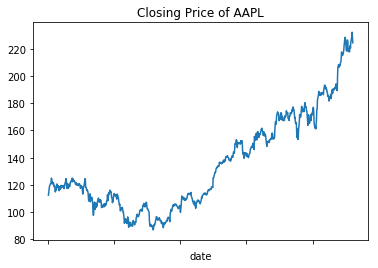

In [29]:
# Import DataReader
import pandas as pd
pd.core.common.is_list_like = pd.api.types.is_list_like # setting appropriate file i.e. version problem
from pandas_datareader.data import DataReader
import pandas_datareader.data as web

from datetime import datetime

start = datetime(2015, 2, 9)

end = datetime(2018, 10, 7)

ticker='AAPL'
f = web.DataReader(ticker, 'iex', start, end)

f.tail()
f['close'].plot(title='Closing Price of '+ticker)
plt.show()

## For commodities bonds etc. we need to go to https://fred.stlouisfed.org/, where we should find ticker code... it is specific for any data... hence 1. we need to visit fred website2. choose data.3. take ticker code4.parse it to python code and get data

### Commodity prices from fred

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 13180 entries, 1968-04-01 to 2018-10-05
Data columns (total 1 columns):
GOLDAMGBD228NLBM    12774 non-null float64
dtypes: float64(1)
memory usage: 205.9 KB


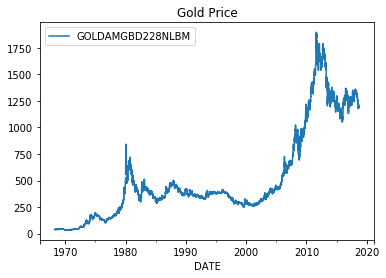

In [30]:
# Import DataReader
import pandas as pd
pd.core.common.is_list_like = pd.api.types.is_list_like # setting appropriate file i.e. version problem
from pandas_datareader.data import DataReader
import matplotlib.pyplot as plt
# Set start date
start = date(1968,1,1)

series = 'GOLDAMGBD228NLBM' ### Here is that code

# Import the data
gold_price = DataReader(series, "fred", start=start)

# Inspect the price of gold
gold_price.info()

# Plot the price of gold
gold_price.plot(title="Gold Price")
# Show the plot
plt.show()


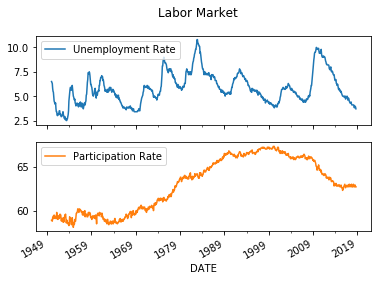

In [31]:
# Set the start date
start = date(1950,1,1)

# Define the series codes
series = ['UNRATE', 'CIVPART']

# Import the data
econ_data =DataReader(series,"fred",start)

# Assign new column labels
econ_data.columns = ["Unemployment Rate","Participation Rate"]

# Plot econ_data
econ_data.plot(subplots=True,title="Labor Market")

# Show the plot
plt.show()

# Bond and stock performance

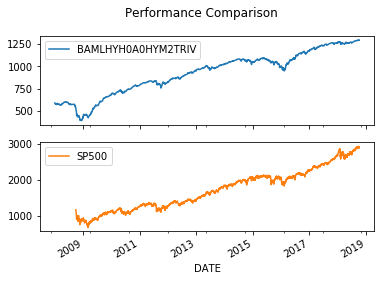

In [34]:
# Set the start date
start = date(2008,1,1)

# Set the series code
series = ['BAMLHYH0A0HYM2TRIV', 'SP500']

# Import the data
data = DataReader(series,"fred",start)

# Plot the results
data.plot(subplots=True,title="Performance Comparison")

# Show the plot
plt.show()

## Summary Stats

In [13]:
# Import the data
income = pd.read_csv("C:\\Users\\Gaya\\Desktop\\PYTHON\\Data\\per_capita_income.csv")

# Inspect the result
income.info()

# Sort the data by income
income = income.sort_values('Income per Capita',ascending=False )

# Display the first and last five rows
print(income.head(5))
print(income.tail(5))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 184 entries, 0 to 183
Data columns (total 2 columns):
Country              184 non-null object
Income per Capita    184 non-null float64
dtypes: float64(1), object(1)
memory usage: 3.0+ KB
               Country  Income per Capita
133              Qatar       141542.66280
97    Macao SAR, China       111496.62940
96          Luxembourg       102051.68030
144          Singapore        85382.30227
23   Brunei Darussalam        78369.29102
                      Country  Income per Capita
121                     Niger         955.483324
94                    Liberia         835.366935
37           Congo, Dem. Rep.         784.365232
26                    Burundi         727.150789
31   Central African Republic         618.752859


In [14]:
# Calculate the mean

print(income['Income per Capita'].mean())

19469.41956573694


In [15]:

# Calculate the median
print(income["Income per Capita"].median())


11620.932519999998


In [16]:

# Create the new column
income['Income per Capita (,000)'] = income["Income per Capita"]//1000


In [17]:

# Calculate the mode of the new column
income['Income per Capita (,000)'].mode()

0    1.0
dtype: float64

In [18]:

# Calculate the standard deviation
print(income["Income per Capita"].std())


21966.861207206075


In [19]:
# Calculate the variance
print(income["Income per Capita"].var())


482542991.2966551


In [20]:
# Generate range of deciles
quantiles = np.arange(0.1,0.91,0.1)

# Print them
print(quantiles)

# Calculate deciles for 'Income per Capita'
deciles = income['Income per Capita'].quantile(quantiles)

# Print them
print(deciles)

# Plot deciles as a bar chart
deciles.plot(kind='bar', title='Global Income per Capita - Deciles')

# Make sure to use the tight layout!
plt.tight_layout()

# Show the plot
plt.show()

NameError: name 'np' is not defined

### We can get all useful statistics by calling pd_df.describe()

In [21]:
income.describe(percentiles=[.25, .5, .75])

,Income per Capita,"Income per Capita (,000)"
count,184.000000,184.000000
mean,19469.419566,18.967391
std,21966.861207,21.975869
min,618.752859,0.000000
25%,3922.358940,3.000000
50%,11620.932520,11.000000
75%,26558.754670,26.000000
max,141542.662800,141.000000


In [22]:
income.sort_values('Income per Capita',ascending=False)

,Country,Income per Capita,"Income per Capita (,000)"
133,Qatar,141542.662800,141.0
97,"Macao SAR, China",111496.629400,111.0
96,Luxembourg,102051.680300,102.0
144,Singapore,85382.302270,85.0
23,Brunei Darussalam,78369.291020,78.0
88,Kuwait,74645.482460,74.0
173,United Arab Emirates,69970.815340,69.0
77,Ireland,68513.974070,68.0
159,Switzerland,62557.491310,62.0
123,Norway,62083.862570,62.0


In [23]:
income['Income per Capita'].median()-income[income.Country=='India']['Income per Capita']

74    5516.356275
Name: Income per Capita, dtype: float64

In [24]:
income.quantile(0.8)

Income per Capita           32517.693902
Income per Capita (,000)       31.800000
Name: 0.8, dtype: float64

       Income per Capita  Income per Capita (,000)
count         184.000000                184.000000
mean        19469.419566                 18.967391
std         21966.861207                 21.975869
min           618.752859                  0.000000
25%          3922.358940                  3.000000
50%         11620.932520                 11.000000
75%         26558.754670                 26.000000
max        141542.662800                141.000000


C:\Users\Gaya\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


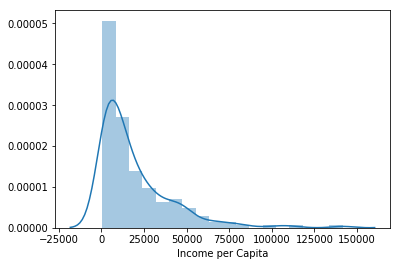

C:\Users\Gaya\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


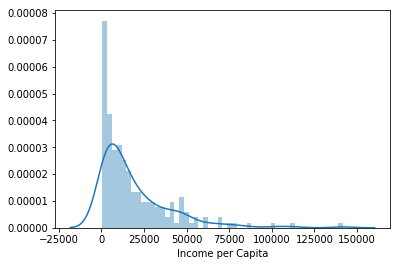

C:\Users\Gaya\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


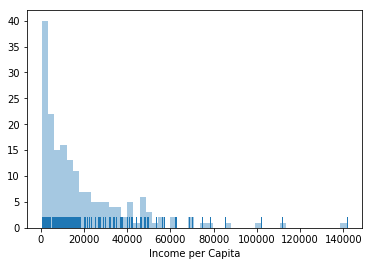

In [25]:
# Import seaborn
import seaborn as sns


# Import matplotlib
import matplotlib.pyplot as plt

# Print the summary statistics for income
print(income.describe())

# Plot a basic histogram of income per capita
sns.distplot(income['Income per Capita'])

# Show the plot
plt.show()

sns.distplot(income['Income per Capita'], bins=50, kde=True)
# Plot a rugplot
# Show the plot
plt.show()
sns.distplot(income['Income per Capita'], bins=50, kde=False, rug=True)

# Show the plot
plt.show()

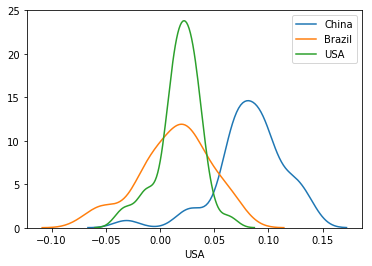

In [26]:
# Load the file into growth
growth = pd.read_csv('C:\\Users\\Gaya\\Desktop\\PYTHON\\Data\\income_growth.csv', parse_dates=['DATE']).set_index('DATE')

# Inspect the summary statistics for the growth rates
growth.describe()

# Iterate over the three columns
for column in growth.columns:
    sns.distplot(growth[column], hist=False, label=column)
    
# Show the plot
plt.show()

C:\Users\Gaya\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


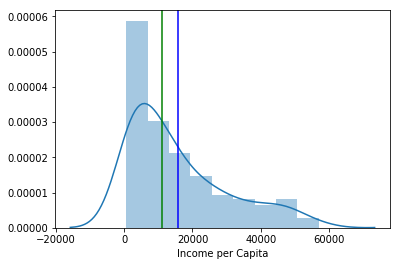

In [27]:
# Create inc_per_capita
inc_per_capita = income['Income per Capita']

# Filter out incomes above the 95th percentile
inc_per_capita = inc_per_capita[inc_per_capita < inc_per_capita.quantile(0.95)]

# Plot histogram and assign to ax
ax = sns.distplot(inc_per_capita)

# Highlight mean
ax.axvline(inc_per_capita.mean(), color='b')

# Highlight median
ax.axvline(inc_per_capita.median(), color='g')

# Show the plot
plt.show()

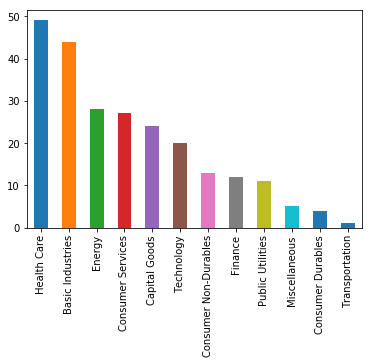

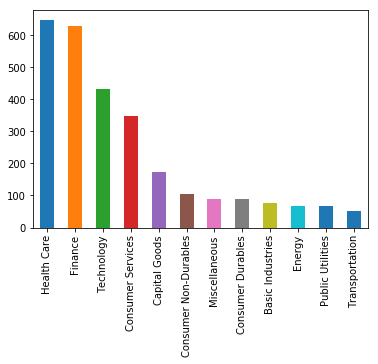

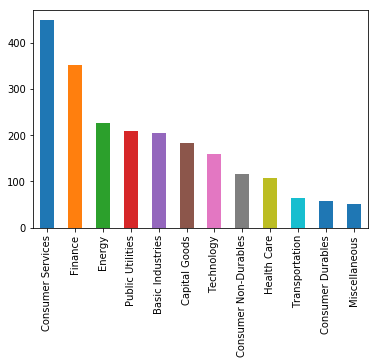

In [28]:
# Create the list exchanges
exchanges = ['amex', 'nasdaq', 'nyse']

# Iterate over exchanges then plot and show result
for i in range(0,3):
    sectors = listings[i].Sector.value_counts()
    # Sort in descending order and plot
    sectors.sort_values(ascending=False).plot(kind='bar')
    #plt.xticks(rotation=40)
    # Show the plot
    plt.show()


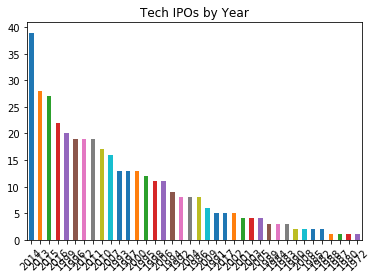

In [29]:
# Create lists
exchanges = ['amex', 'nasdaq', 'nyse']
all_listings = []

# Use for loop to create listing_data
for i in range(0,3):
    all_listings.append(listings[i])
    
# Combine DataFrames
listing_data = pd.concat(all_listings)

# Select tech companies
tech_companies = listing_data[listing_data.Sector == 'Technology']

# Create ipo_years
ipo_years = tech_companies['IPO Year']

# Drop missing values and convert to int
ipo_years = ipo_years.dropna().astype(int)

# Count values, sort by year, and create a bar plot
ipo_years.value_counts().plot(kind='bar', title='Tech IPOs by Year')

# Rotate xticks and show result
plt.xticks(rotation=45)

# Show the plot
plt.show()

## Applying groupby() method

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3147 entries, 0 to 3146
Data columns (total 8 columns):
Stock Symbol             3147 non-null object
Company Name             3147 non-null object
Last Sale                3079 non-null float64
Market Capitalization    3147 non-null float64
IPO Year                 1361 non-null float64
Sector                   2177 non-null object
Industry                 2177 non-null object
Exchange                 3147 non-null object
dtypes: float64(3), object(5)
memory usage: 196.8+ KB


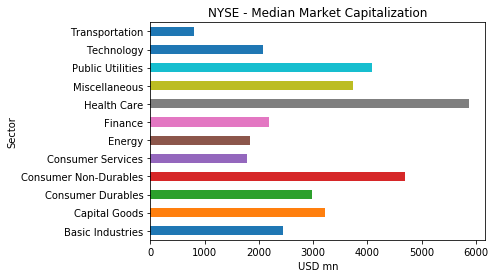

In [11]:
# Inspect NYSE data
nyse.info()

# Create market_cap_m
nyse['market_cap_m'] = nyse['Market Capitalization'].div(1e6)

# Drop market cap column
nyse = nyse.drop('Market Capitalization', axis=1)

# Group nyse by sector
mcap_by_sector = nyse.groupby('Sector')

# Calculate median
median_mcap_by_sector = mcap_by_sector.market_cap_m.median()

# Plot and show as horizontal bar chart
median_mcap_by_sector.plot(kind='barh', title='NYSE - Median Market Capitalization')

# Add the label
plt.xlabel('USD mn')

# Show the plot
plt.show()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6674 entries, 0 to 3146
Data columns (total 8 columns):
Stock Symbol             6674 non-null object
Company Name             6674 non-null object
Last Sale                6590 non-null float64
Market Capitalization    6674 non-null float64
IPO Year                 2852 non-null float64
Sector                   5182 non-null object
Industry                 5182 non-null object
Exchange                 6674 non-null object
dtypes: float64(3), object(5)
memory usage: 469.3+ KB
     Stock Symbol                                       Company Name  \
0            XXII                            22nd Century Group, Inc   
1             FAX              Aberdeen Asia-Pacific Income Fund Inc   
2             IAF                 Aberdeen Australia Equity Fund Inc   
3              CH                          Aberdeen Chile Fund, Inc.   
4  ABE             Aberdeen Emerging Markets Smaller Company Oppo...   

   Last Sale  Market Capitalization 

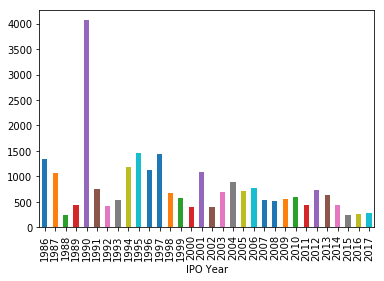

In [13]:
# Inspect listings
listing_data.info()


# Show listings head
print(listing_data.head())

# Create market_cap_m
listing_data['market_cap_m'] = listing_data['Market Capitalization'].div(1e6)

# Select companies with IPO after 1985
listing_data = listing_data[listing_data['IPO Year'] > 1985]

# Drop missing values and convert to integers
listing_data['IPO Year'] = listing_data['IPO Year'].dropna().astype(int)

# Calculate the median market cap by IPO Year and sort the index
ipo_by_year = listing_data.groupby('IPO Year').market_cap_m.median().sort_index()

# Plot results as a bar chart
ipo_by_year.plot(kind='bar')

# Show the plot
plt.show()

In [14]:
# Inspect NASDAQ data
nasdaq.info()

# Create market_cap_m
nasdaq['market_cap_m'] = nasdaq['Market Capitalization'].div(1e6)

# Drop the Market Capitalization column
nasdaq.drop('Market Capitalization', axis=1, inplace=True)

# Group nasdaq by Sector
nasdaq_by_sector = nasdaq.groupby('Sector')

# Create summary statistics by sector
summary = nasdaq_by_sector.describe()

# Print the summary
print(summary)

# Unstack 
summary = summary.unstack()

# Print the summary again
print(summary)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3167 entries, 0 to 3166
Data columns (total 8 columns):
Stock Symbol             3167 non-null object
Company Name             3167 non-null object
Last Sale                3165 non-null float64
Market Capitalization    3167 non-null float64
IPO Year                 1386 non-null float64
Sector                   2767 non-null object
Industry                 2767 non-null object
Exchange                 3167 non-null object
dtypes: float64(3), object(5)
memory usage: 198.0+ KB
                      IPO Year                                           \
                         count         mean        std     min      25%   
Sector                                                                    
Basic Industries          30.0  2000.766667  12.516701  1972.0  1993.25   
Capital Goods             77.0  2001.324675  10.593495  1972.0  1993.00   
Consumer Durables         36.0  2003.222222   9.908470  1983.0  1994.75   
Consumer Non-Durabl

Sector            Exchange
Basic Industries  amex         137.318135
                  nasdaq       169.181116
                  nyse        1672.751912
Capital Goods     amex         107.390617
                  nasdaq       477.069539
Name: market_cap_m, dtype: float64


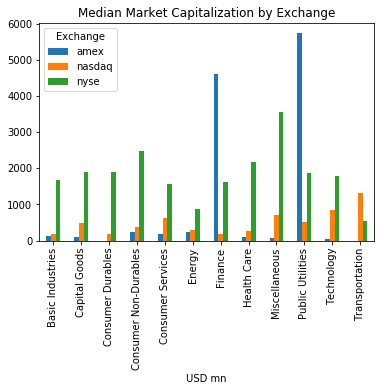

In [15]:
# Group listings by Sector and Exchange
by_sector_exchange = listing_data.groupby(['Sector', 'Exchange'])

# Calculate the median market cap
mcap_by_sector_exchange = by_sector_exchange.market_cap_m.median()

# Display the head of the result
print(mcap_by_sector_exchange.head())

# Unstack mcap_by_sector_exchange
mcap_unstacked = mcap_by_sector_exchange.unstack()

# Plot as a bar chart
mcap_unstacked.plot(kind='bar', title='Median Market Capitalization by Exchange')

# Set the x label
plt.xlabel('USD mn')

# Show the plot
plt.show()

## Aggregating data by using .agg() method

In [4]:
# Create market_cap_m
listing_data['market_cap_m'] = listing_data['Market Capitalization'].div(1e6)

# Group listing by both Sector and Exchange
by_sector_exchange = listing_data.groupby(['Sector', 'Exchange'])

# Subset market_cap_m of by_sector_exchange
bse_mcm = by_sector_exchange['market_cap_m']

# Calculate mean, median, and std in summary
summary = bse_mcm.agg({'Average': 'mean', 'Median': 'median', 'Standard Deviation': 'std'})

# Print the summary
print(summary)

                                     Average       Median  Standard Deviation
Sector                Exchange                                               
Basic Industries      amex        391.646249   148.564581          605.307911
                      nasdaq      724.899934   150.385214         1445.544949
                      nyse       9590.514730  2450.240499        24845.469793
Capital Goods         amex        113.943659    49.596035          161.946636
                      nasdaq     1511.237373   293.801019         4829.846757
                      nyse      10166.901284  3215.112817        20254.615284
Consumer Durables     amex        234.445870    18.337396          441.813008
                      nasdaq      839.802607   177.593858         1907.604606
                      nyse       5854.121680  2982.585002         8996.673435
Consumer Non-Durables amex       8868.469007    60.087022        31715.734906
                      nasdaq     3104.051206   229.930660       

C:\Users\Gaya\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  # This is added back by InteractiveShellApp.init_path()


## Visualizing with seaborn countplot

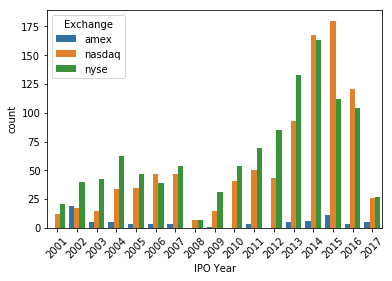

In [8]:
# Select IPOs after 2000
listing_data = listing_data[listing_data['IPO Year'] > 2000]

# Convert IPO Year to integer
listing_data['IPO Year'] = listing_data['IPO Year'].astype(int)

# Create a countplot
sns.countplot(x='IPO Year', hue='Exchange', data=listing_data)

# Rotate xticks and show result
plt.xticks(rotation=45)

# Show the plot
plt.show()

## The code below creates barplot with seaborn package but data is not available hence we cannot plot it

In [ ]:

# Inspect the data
income_trend.info()

# Create barplot
sns.barplot(x='Year', y='Income per Capita', data=income_trend)

# Rotate xticks
plt.xticks(rotation=45)

# Show the plot
plt.show()

# Close the plot
plt.close()

# Create second barplot
sns.barplot(x='Year', y='Income per Capita', data=income_trend, estimator=np.median)

# Rotate xticks
plt.xticks(rotation=45)

# Show the plot
plt.show()

## Pointplot with seaborn

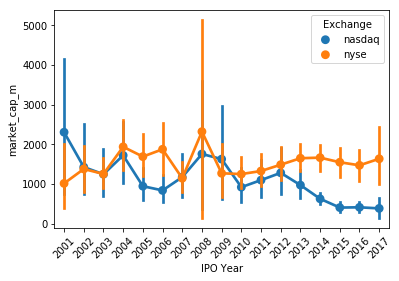

In [43]:
# Import the seaborn library as sns
import seaborn as sns

# Exclude IPOs before 2000 and from the 'amex'
listing_data = listing_data[(listing_data['IPO Year'] > 2000) & (listing_data.Exchange != 'amex')]

# Convert IPO Year to integer
listing_data['IPO Year'] = listing_data['IPO Year'].astype(int)

# Create market_cap_m
listing_data['market_cap_m'] = listing_data['Market Capitalization'].div(1e6)

# Exclude outliers
listing_data = listing_data[listing_data.market_cap_m < listing_data.market_cap_m.quantile(.95)]

# Create the pointplot
sns.pointplot(x='IPO Year', y='market_cap_m', hue='Exchange', data=listing_data)

# Rotate xticks
plt.xticks(rotation=45)

# Show the plot
plt.show()

## Boxlpot and swarmplot

In [ ]:
# Create boxplot
sns.boxplot(x='Country', y='Inflation', data=inflation)

# Show the plot
plt.show()

# Close the plot
plt.close()

# Create swarmplot
sns.swarmplot(x='Country', y='Inflation', data=inflation)

# Show the plot
plt.show()